# Hyperparameters

Consider the Booth test function (below). This function varies differently in different directions, and these directions are somewhat skewed with respect to the inputs. Our agent will automatically fit the right hyperparameters to account for this.

Text(0, 0.5, 'x2')

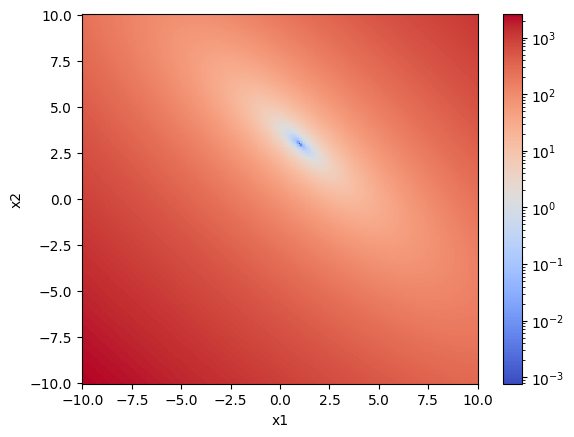

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from blop.utils import functions

x1 = x2 = np.linspace(-10, 10, 256)
X1, X2 = np.meshgrid(x1, x2)

F = functions.booth(X1, X2)

plt.pcolormesh(x1, x2, F, norm=mpl.colors.LogNorm(), shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

The optimization goes faster if our model understands how the function changes as we change the inputs in different ways. The way it picks up on this is by starting from a general model that could describe a lot of functions, and making it specific to this one by choosing the right hyperparameters. Our Bayesian agent is very good at this, and only needs a few samples to figure out what the function looks like:

In [2]:
def digestion(db, uid):
    products = db[uid].table()

    for index, entry in products.iterrows():
        products.loc[index, "booth"] = functions.booth(entry.x1, entry.x2)

    return products

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-01-30 23:38:57
Persistent Unique Scan ID: '9ef6e527-ba08-4ca1-a269-0cd88a34fa29'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 23:38:57.4 |     -1.330 |      0.412 |
|         2 | 23:38:57.4 |     -4.302 |      1.862 |
|         3 | 23:38:57.4 |     -5.081 |     -1.237 |
|         4 | 23:38:57.4 |     -3.056 |     -3.024 |
|         5 | 23:38:57.4 |     -2.052 |     -2.488 |
|         6 | 23:38:57.4 |      0.570 |     -2.093 |
|         7 | 23:38:57.4 |     -0.308 |     -5.248 |
|         8 | 23:38:57.4 |      1.569 |     -5.544 |
|         9 | 23:38:57.4 |      4.820 |     -4.182 |
|        10 | 23:38:57.4 |      3.539 |     -0.180 |
|        11 | 23:38:57.4 |      2.790 |      0.819 |
|        12 | 23:38:57.4 |      5.819 |      2.908 |
|        13 | 23:38:57.4 |      3.818 | 

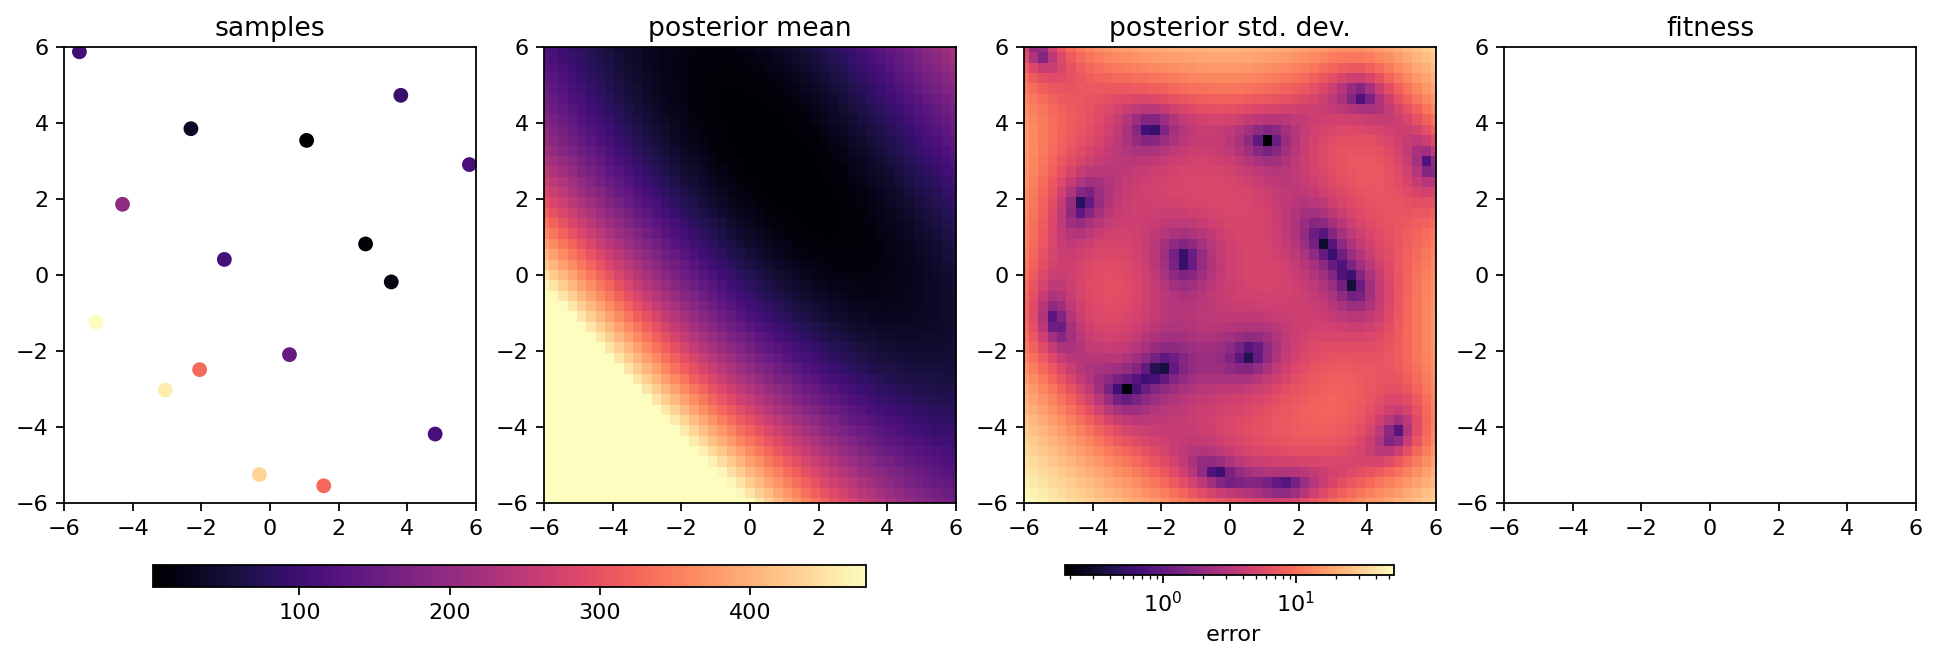

In [3]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

from blop import DOF, Objective, Agent

dofs = [
    DOF(name="x1", search_bounds=(-6, 6)),
    DOF(name="x2", search_bounds=(-6, 6)),
]

objectives = [
    Objective(name="booth", target="min"),
]


agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    db=db,
)

RE(agent.learn(acq_func="qr", n=16))

agent.plot_objectives()

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

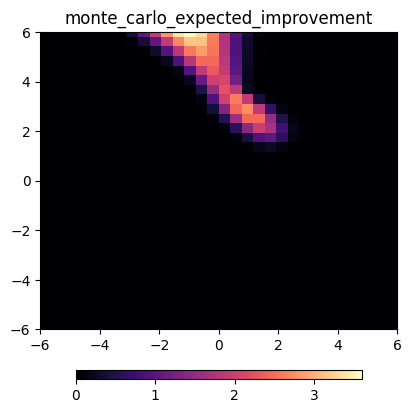

In [4]:
agent.plot_acquisition(acq_func="qei")

running iteration 1 / 4




Transient Scan ID: 2     Time: 2024-01-30 23:39:00
Persistent Unique Scan ID: 'cc5fddd7-4927-41e0-861b-7b71aa55a8a7'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 23:39:00.5 |     -1.005 |      6.000 |
|         2 | 23:39:00.5 |      0.083 |      3.946 |
|         3 | 23:39:00.5 |      0.942 |      2.830 |
|         4 | 23:39:00.5 |      1.487 |      2.481 |
+-----------+------------+------------+------------+
generator list_scan ['cc5fddd7'] (scan num: 2)





running iteration 2 / 4




Transient Scan ID: 3     Time: 2024-01-30 23:39:02
Persistent Unique Scan ID: '9e96ee7c-7eaf-4998-b46e-91fbcb83c7dc'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 23:39:02.3 |      1.168 |      2.659 |
|         2 | 23:39:02.3 |      1.141 |      2.859 |
|         3 | 23:39:02.3 |      0.977 |      3.020 |
|         4 | 23:39:02.3 |      0.734 |      3.234 |
+-----------+------------+------------+------------+
generator list_scan ['9e96ee7c'] (scan num: 3)





running iteration 3 / 4




Transient Scan ID: 4     Time: 2024-01-30 23:39:02
Persistent Unique Scan ID: '41149b6f-220d-4b6c-96cf-5fee56420fac'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 23:39:02.8 |      0.833 |      3.147 |
|         2 | 23:39:02.8 |      0.941 |      3.004 |
|         3 | 23:39:02.8 |      0.997 |      3.012 |
|         4 | 23:39:02.8 |      3.151 |      3.078 |
+-----------+------------+------------+------------+
generator list_scan ['41149b6f'] (scan num: 4)





running iteration 4 / 4


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/botorch/optim/optimize.py:367: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)




Transient Scan ID: 5     Time: 2024-01-30 23:39:03
Persistent Unique Scan ID: 'd981afb0-dc51-4a21-84f5-55e33d5d873c'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 23:39:03.9 |      0.886 |      3.099 |
|         2 | 23:39:03.9 |      1.048 |      2.980 |
|         3 | 23:39:03.9 |      1.164 |      2.901 |
|         4 | 23:39:03.9 |      1.976 |      2.475 |
+-----------+------------+------------+------------+
generator list_scan ['d981afb0'] (scan num: 5)





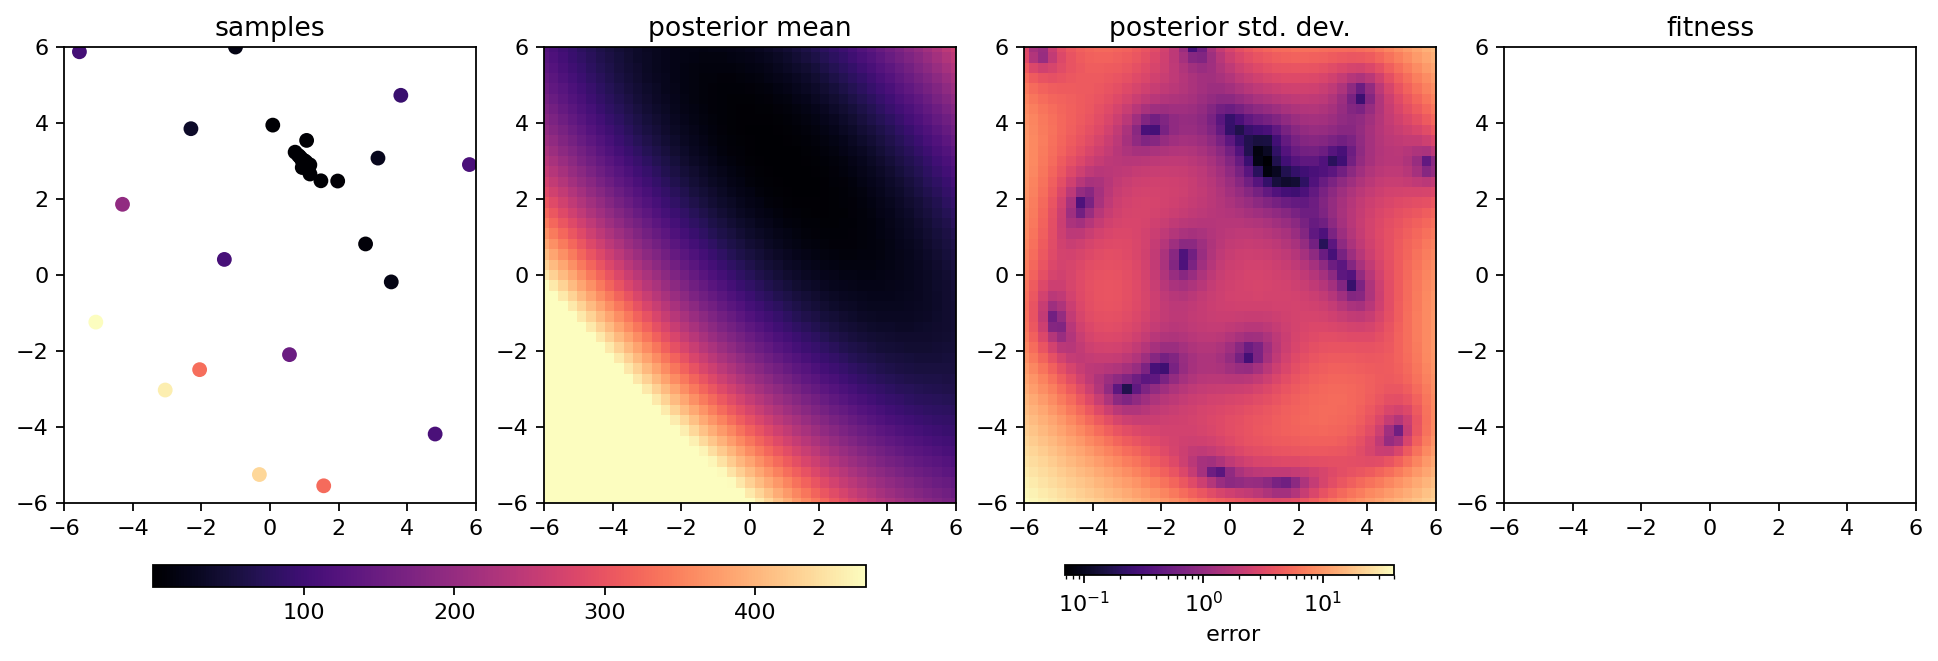

In [5]:
RE(agent.learn("qei", n=4, iterations=4))
agent.plot_objectives()

In [6]:
agent.best

x1                                  0.997289
x2                                  3.012196
booth                               0.000516
time                     1706657942896924734
acq_func    monte_carlo_expected_improvement
Name: 26, dtype: object